### Problem Statement:
### Client runs a contact center which manages IT backend support team here in India. There are experiencing high Average Handling Time (AHT), which is a big concern. They are in need of support from analytics team in driving key decision in this regard.

### Using your data science experience please do either of the following:
###        Text mining on the textual feedback data


Importing all Libraries

In [364]:
import os

In [365]:
import nltk,string

In [366]:
from string import punctuation

In [367]:
import spacy
import en_core_web_sm
from collections import Counter

In [368]:
import nltk.corpus

In [369]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [370]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/ankith/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [371]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Reading the data file

In [372]:
df=pd.read_excel('/home/ankith/Downloads/Worksheet in Analysis Case Study.xlsb',engine='pyxlsb')

In [373]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146595 entries, 0 to 146594
Data columns (total 49 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Ticket Number                     146595 non-null  object 
 1   Created Calendar Date             146595 non-null  int64  
 2   Submit Date                       146595 non-null  float64
 3   Month                             146595 non-null  object 
 4   Week                              146595 non-null  int64  
 5   Year                              146595 non-null  int64  
 6   Day                               146595 non-null  object 
 7   month_week                        146595 non-null  int64  
 8   Last Resolved Date                146595 non-null  float64
 9   Resolved Client Year WorkWeek     146595 non-null  int64  
 10  Resolved Client Year Month        146595 non-null  int64  
 11  Resolved Client Year Quarter      146595 non-null  i

Perform EDA to get the basic unerstanding of the data

77% Customers are Very Satisfied with Service Quality

In [374]:
df['Service Quality'].value_counts(normalize=True)

Very Satisfied       0.771579
Satisfied            0.125524
Very Dissatisfied    0.047693
Neutral              0.027992
Dissatisfied         0.022237
0                    0.004974
Name: Service Quality, dtype: float64

/home/ankith/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Agent Skill', ylabel='count'>

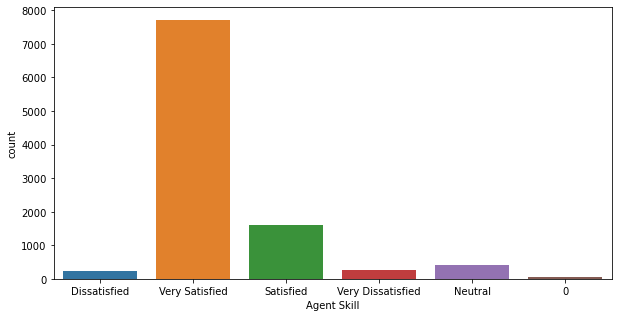

In [375]:
plt.figure(figsize=(10,5))
sns.countplot(df['Agent Skill'])

Low priority Tickets are 'very Satisfied' by the agent

/home/ankith/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Service Quality', ylabel='count'>

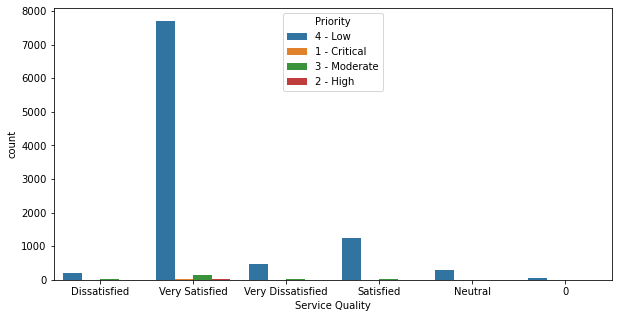

In [376]:
plt.figure(figsize=(10,5))
sns.countplot(df['Service Quality'],hue=df['Priority'])

In [377]:
df['Reopened'].value_counts(normalize=True)

No     0.969699
Yes    0.030301
Name: Reopened, dtype: float64

Low Priority Tickets has been escalated more

/home/ankith/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Priority', ylabel='count'>

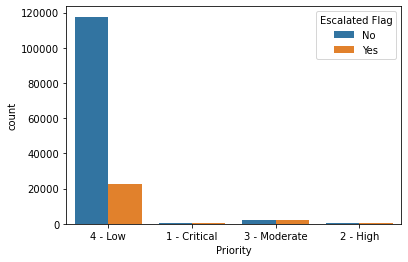

In [378]:
sns.countplot(df['Priority'],hue=df['Escalated Flag'])

In [379]:
# Identify Number of Unique Ticket Number and Flag them

In [380]:
df['Unique TicketNumber Flag']=df.duplicated(['Ticket Number'],keep='first')

In [381]:
df[df['Unique TicketNumber Flag']==True]

Empty DataFrame
Columns: [Ticket Number, Created Calendar Date, Submit Date, Month, Week, Year, Day, month_week, Last Resolved Date, Resolved Client Year WorkWeek, Resolved Client Year Month, Resolved Client Year Quarter, Escalated Agent Start Date, Resolved Agent Service Desk, Resolved Agent Team, Status Class, SLM Status, Short Description, APP BIC, Service Sub Type, Priority, Escalated Flag, Escalated Audit Date, Cancel Reason Description, CSAT (%), Knowledge Artical Number, Knowledge Title, Product Name, Service, Service Component, Contact Type, TAC Resolved, Country Name, Reopened, Reopened E2E, Region Code, TTR_Hours, TTR Less Than or Equal to 1 hr, TTR Less Than or Equal to 90 min, TTR Less Than or Equal to 30 min, CSAT, Agent Courtesy, Agent Skill, Service Quality, Service Timeliness, Easy To Use Service, Site Code, Support Skill, General Comment, Unique TicketNumber Flag]
Index: []

[0 rows x 50 columns]

Checking for Null values in General Comment column 

In [382]:
df['General Comment'].isnull().sum()

136356

Remove Null and Comments with 0 from General Comment column

In [383]:
df=df[~df['General Comment'].isnull()]
df=df.drop((df[df['General Comment']==0]).index,axis=0)

Remove Duplicate Comments

In [384]:
flag=df.duplicated(['General Comment'],keep='first')
df=df[~flag]

In [385]:
df["CSAT"].value_counts(normalize = True)

5.0    0.652359
4.0    0.103211
1.0    0.102228
2.0    0.077326
3.0    0.064875
Name: CSAT, dtype: float64

/home/ankith/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



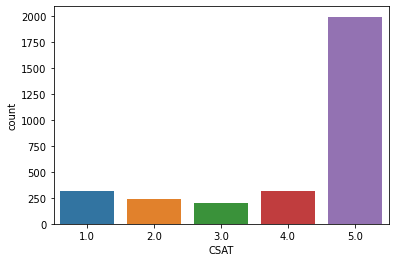

In [386]:
sns.countplot(df['CSAT'])
plt.savefig('/home/ankith/Documents/Infosys_data/CSAT_Rating.jpeg')

Creating Feedback Column(Positive,Negative,Neutral) based on the CSAT(Rating column given by the Customer)

In [387]:
conditions=[
    df['CSAT']>3,
    df['CSAT']==3,
    df['CSAT']<3
]
df['Feedback']=np.select(conditions,['Positive','Neutral','Negative'])

In [388]:
df_text=df[['General Comment','CSAT','Feedback']]

In [389]:
df_text.head()

General Comment  CSAT  Feedback
18   The language barrier makes the process very fr...   2.0  Negative
36                                   Thank you Shruti!   5.0  Positive
40      Thank you for the quick and afficient support.   5.0  Positive
226  Excellent agent support very professional, app...   5.0  Positive
237  I'm eligible for a PC refresh but the only ord...   5.0  Positive

Plotting the Pie chart of the percentage of different sentiments of all the Feedback

In [392]:
!pip install -U plotly

Requirement already up-to-date: plotly in ./anaconda3/lib/python3.8/site-packages (4.14.3)


In [393]:
import plotly.express as px

In [394]:
fig = px.pie(df_text, names='Feedback', title ='Pie chart for Feedback Segments')
fig.write_image("/home/ankith/Documents/Infosys_data/Feedback_Piechart1.jpeg")
fig.show()


Plotting the distribution of text length for positive feedback

<ipython-input-410-0c67985d79ee>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



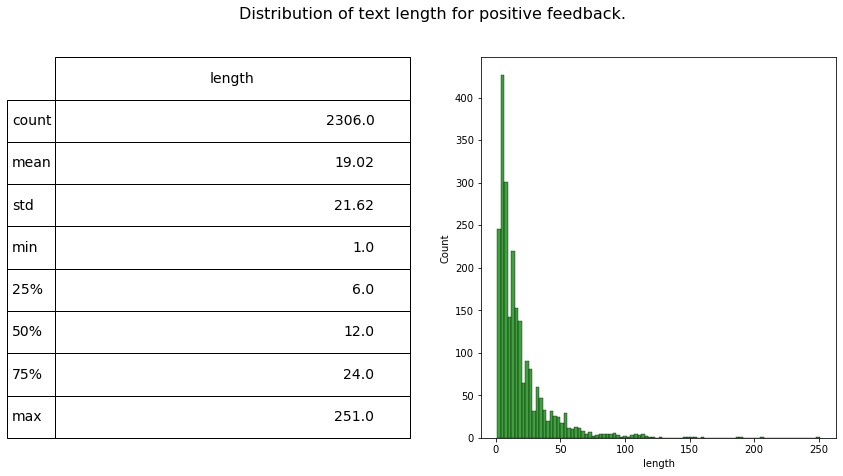

In [410]:
fig = plt.figure(figsize=(14,7))
df_text['length'] = df_text['General Comment'].str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df_text[df_text['Feedback']=='Positive']['length'], ax=ax1,color='green')
describe = df_text.length[df_text.Feedback=='Positive'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for positive feedback.', fontsize=16)
plt.savefig('/home/ankith/Documents/Infosys_data/PositiveComments.jpeg')
plt.show()


Plotting the distribution of text length for Negative feedback

<ipython-input-411-da71d1f34664>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



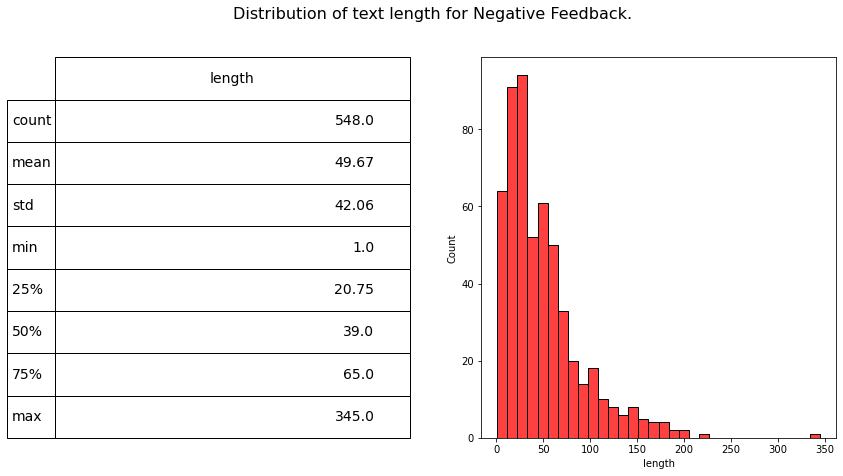

In [411]:
fig = plt.figure(figsize=(14,7))
df_text['length'] = df_text['General Comment'].str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df_text[df_text['Feedback']=='Negative']['length'], ax=ax1,color='red')
describe = df_text.length[df_text.Feedback=='Negative'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for Negative Feedback.', fontsize=16)
plt.savefig('/home/ankith/Documents/Infosys_data/NegativeComments.jpeg')
plt.show()


<ipython-input-412-909de947701f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



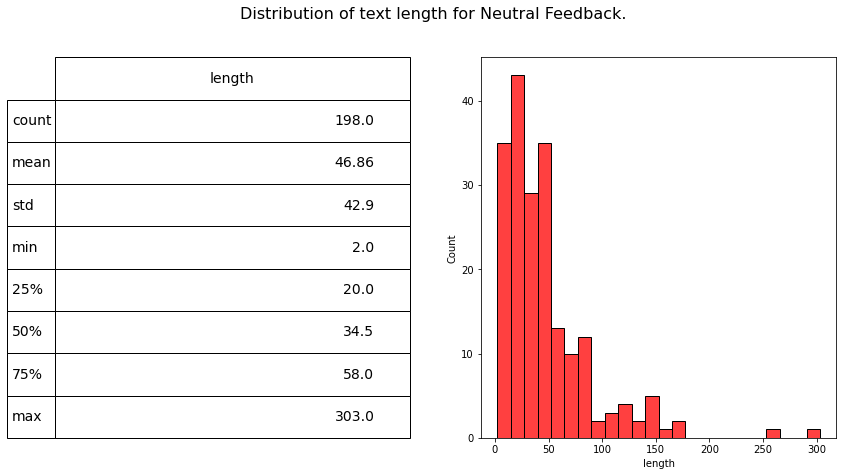

In [412]:
fig = plt.figure(figsize=(14,7))
df_text['length'] = df_text['General Comment'].str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df_text[df_text['Feedback']=='Neutral']['length'], ax=ax1,color='red')
describe = df_text.length[df_text.Feedback=='Neutral'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for Neutral Feedback.', fontsize=16)
plt.savefig('/home/ankith/Documents/Infosys_data/NeutralComments.jpeg')
plt.show()

In [413]:
df_text['Feedback'].value_counts()

Positive    2306
Negative     548
Neutral      198
Name: Feedback, dtype: int64

Check If Features are good or not

Distribution of Feedback with Text length

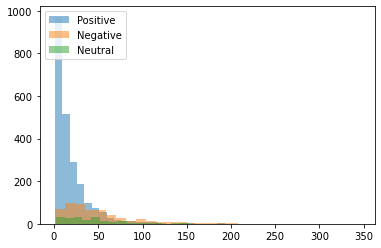

In [414]:
bins=np.linspace(0,200,40)
plt.hist(df_text[df_text['Feedback']=='Positive']['length'],bins=30,alpha=0.5,label='Positive')
plt.hist(df_text[df_text['Feedback']=='Negative']['length'],bins=30,alpha=0.5,label='Negative')
plt.hist(df_text[df_text['Feedback']=='Neutral']['length'],bins=30,alpha=0.5,label='Neutral')
plt.legend(loc='upper left')
plt.savefig('/home/ankith/Documents/Infosys_data/DistributionFeedback.jpeg')
plt.show()

Remove Punctuations from the text column

In [415]:
def remove_punct(text):
    text_nopunc= "".join([char for char in text if char not in string.punctuation])
    return text_nopunc
df_text['verify_punctations']=df_text['General Comment'].apply(lambda x: remove_punct(x))

<ipython-input-415-06cf04891c37>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Remove Numbers from the text column

In [416]:
def remove_number(text):
    text_nopunc= ''.join([i for i in text if not i.isdigit()])
    return text_nopunc
df_text['verify_punctations']=df_text['verify_punctations'].apply(lambda x: remove_number(x))

<ipython-input-416-a535e6416223>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [417]:
df_text['verify_punctations']

18        The language barrier makes the process very fr...
36                                         Thank you Shruti
40            Thank you for the quick and afficient support
226       Excellent agent support very professional appr...
237       Im eligible for a PC refresh but the only orde...
                                ...                        
146478    JafferX Shariff was fabulous He listened to me...
146514    The agent dealing with my case were great They...
146533    I called  times Sometimes I was on hold and th...
146535                   Kudoos to Gaikwad Vishaka Digambar
146568    Timely support Really appreciate the quick tur...
Name: verify_punctations, Length: 3052, dtype: object

Seprating words into unit through Tokenization

In [418]:
def remove_toke(text):
    word_token=nltk.word_tokenize(text)
    return word_token
df_text['Verify_token']=df_text['verify_punctations'].apply(lambda x: remove_toke(x))

<ipython-input-418-5276fb182d9a>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Reset the index of DataFrame

In [419]:
df_text.reset_index(drop=True,inplace=True)

In [420]:
df_text['Verify_token']

0       [The, language, barrier, makes, the, process, ...
1                                    [Thank, you, Shruti]
2       [Thank, you, for, the, quick, and, afficient, ...
3       [Excellent, agent, support, very, professional...
4       [Im, eligible, for, a, PC, refresh, but, the, ...
                              ...                        
3047    [JafferX, Shariff, was, fabulous, He, listened...
3048    [The, agent, dealing, with, my, case, were, gr...
3049    [I, called, times, Sometimes, I, was, on, hold...
3050             [Kudoos, to, Gaikwad, Vishaka, Digambar]
3051    [Timely, support, Really, appreciate, the, qui...
Name: Verify_token, Length: 3052, dtype: object

Extracting the Adjectives from the text column

In [421]:
def get_adjectives(text):
    #blob = TextBlob(text)
    tag=nltk.pos_tag(text)
    return [ word for word,t in tag if 'JJ' in t]

df_text['Adjectives'] = df_text['Verify_token'].apply(lambda x:get_adjectives(x))

<ipython-input-421-6794b91afe3f>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [422]:
df_text['Adjectives']

0                                           [frustrating]
1                                                      []
2                                             [afficient]
3                               [Excellent, professional]
4                                         [only, refresh]
                              ...                        
3047    [fabulous, install, able, global, compatible, ...
3048    [great, strict, connect, great, more, wrong, s...
3049                                                   []
3050                                                   []
3051                                              [quick]
Name: Adjectives, Length: 3052, dtype: object

Used Spacy to idetinfy Verbs in Review Column and Lammatize in Column L

In [423]:
nlp = en_core_web_sm.load()
def identify_verbs(text):
    docs = nlp(text)
    verbs = [verbs for verbs in docs if verbs.is_punct !=True and verbs.pos_ == 'VERB']
    return verbs
df_text['Verbs (Lamatize)']=df_text['General Comment'].apply(lambda x: identify_verbs(x))

<ipython-input-423-13d5f4adbe9b>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Remove Stopwords from the Genereal Comment Text column

In [424]:
stopword=nltk.corpus.stopwords.words('english')
def remove_stopwords(tokeniz_list):
    text=[word for word in tokeniz_list if word not in stopword]
    return text
df_text['Verify_stop']=df_text['Verify_token'].apply(lambda x: remove_stopwords(x))

<ipython-input-424-860de9928f96>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Removal of Frequent words(we might have some frequent words which are of not so much importance to us)

In [425]:
from collections import Counter
cnt = Counter()
for text in df_text["General Comment"].values:
    for word in text.split():
        cnt[word] += 1

In [426]:
cnt.most_common(10)

[('the', 3502),
 ('to', 3258),
 ('and', 2428),
 ('I', 2012),
 ('was', 1938),
 ('a', 1305),
 ('my', 1170),
 ('for', 954),
 ('not', 844),
 ('is', 814)]

In [427]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

df_text["Verify_stop"] = df_text["Verify_stop"].apply(lambda text: remove_freqwords(text))

<ipython-input-427-f5e92c355e8f>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Removal of Rare words from the General Comment Text Column

In [428]:
n_rare_words = 10
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
def remove_rarewords(text):
    
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

df_text["Verify_stop"] = df_text["Verify_stop"].apply(lambda text: remove_rarewords(text))
df_text.head()

<ipython-input-428-35802ed1bb06>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



General Comment  CSAT  Feedback  length  \
0  The language barrier makes the process very fr...   2.0  Negative      17   
1                                  Thank you Shruti!   5.0  Positive       3   
2     Thank you for the quick and afficient support.   5.0  Positive       8   
3  Excellent agent support very professional, app...   5.0  Positive       8   
4  I'm eligible for a PC refresh but the only ord...   5.0  Positive      57   

                                  verify_punctations  \
0  The language barrier makes the process very fr...   
1                                   Thank you Shruti   
2      Thank you for the quick and afficient support   
3  Excellent agent support very professional appr...   
4  Im eligible for a PC refresh but the only orde...   

                                        Verify_token  \
0  [The, language, barrier, makes, the, process, ...   
1                               [Thank, you, Shruti]   
2  [Thank, you, for, the, quick, and, afficient, ...   
3  [Excellent, agent, support, very, professional...   
4  [Im, eligible, for, a, PC, refresh, but, the, ...   

                  Adjectives  \
0              [frustrating]   
1                         []   
2                [afficient]   
3  [Excellent, professional]   
4            [only, refresh]   

                                    Verbs (Lamatize)  \
0                    [makes, understand, understand]   
1                                            [Thank]   
2                                            [Thank]   
3                              [support, appreciate]   
4  ['m, is, go, appears, stating, 'm, thought, up...   

                                         Verify_stop  
0  ['The', 'language', 'barrier', 'makes', 'proce...  
1                                ['Thank', 'Shruti']  
2         ['Thank', 'quick', 'afficient', 'support']  
3  ['Excellent', 'agent', 'support', 'professiona...  
4  ['Im', 'eligible', 'PC', 'refresh', 'order', '...

In [437]:
import itertools
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

# import plotly.offline as pyo

# Set notebook mode to work in offline
pyo.init_notebook_mode()
df_text = df_text.sort_values(by='length')
plt3 = go.Scatter(x = df_text.length, y = df_text.CSAT, mode='markers')
lyt3 = go.Layout(title="Review Length vs.  Rating", xaxis=dict(title='length'),yaxis=dict(title='CSAT'))
fig3 = go.Figure(data=[plt3], layout=lyt3)
iplot(fig3)
fig3.write_image('/home/ankith/Documents/Infosys_data/ReviewLength.jpeg')

print("Review Length to Rating Correlation:",df_text.length.corr(df_text.CSAT))

Review Length to Rating Correlation: -0.42173223371980734


Get the most common words

Most of the words are related to the help,laptop, PC etc. Some words are more related to the customer experiencelike Neutral,annoying etc.

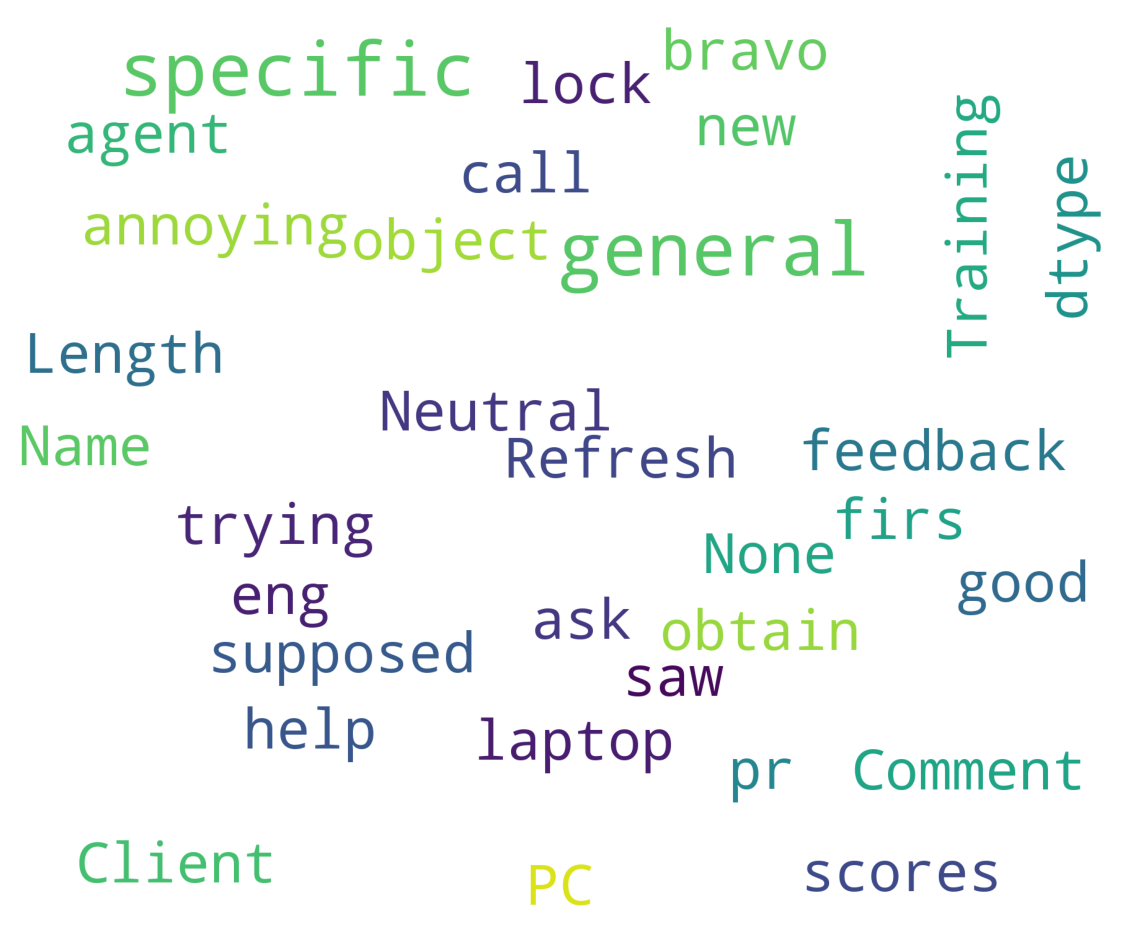

In [280]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        width=600,
        height=500,
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.savefig('/home/ankith/Documents/Infosys_data/CommonWords.jpeg')
    plt.show()
    
    
# print wordcloud
show_wordcloud(df_text["General Comment"])

In [281]:
from wordcloud import WordCloud, STOPWORDS

def wordcount_gen(df, category):
    
    # Combine all Feedback
    combined_review = " ".join([review for review in df_text[df_text.Feedback==category]['General Comment']])
                          
    # Initialize wordcloud object
    wc = WordCloud(background_color='white', 
                   max_words=50, 
                   stopwords = STOPWORDS)

    # Generate and plot wordcloud
    plt.figure(figsize=(10,10))
    plt.imshow(wc.generate(combined_review))
    plt.title('{} Sentiment Words'.format(category), fontsize=20)
    plt.axis('off')
    plt.savefig('/home/ankith/Documents/Infosys_data/PositiveCommonWords.jpeg')
    plt.show()

Positive Comments

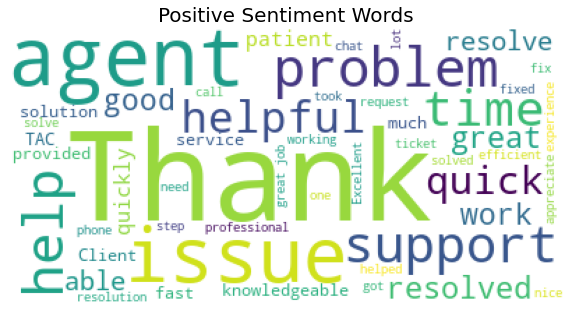

In [282]:
wordcount_gen(df, 'Positive')

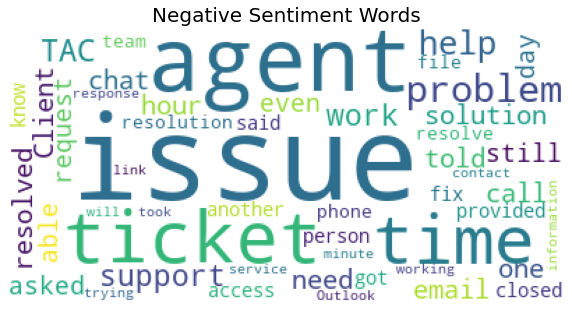

In [55]:
# Negative Comments
wordcount_gen(df, 'Negative')

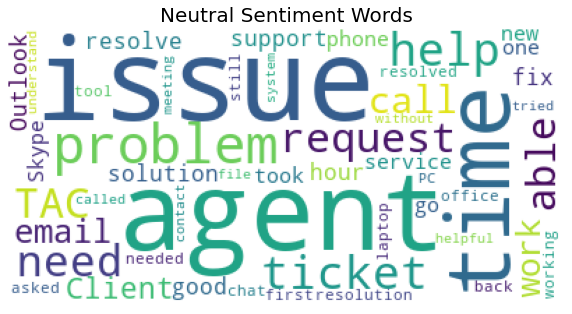

In [57]:
# Neutral Comments
wordcount_gen(df, 'Neutral')

In [283]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

Lemmatization is used to normalize the word like 'Eating' we will get 'EAT' , we also need to provide the POS tag along with the word for lemmatizer in nltk. Depending on the POS, the lemmatizer may return different results.

For example , we are passing stripes check the lemma when it is both verb and noun.

In [284]:
lemmatizer = WordNetLemmatizer()
print("Lemma result for verb : ",lemmatizer.lemmatize("stripes", 'v'))
print("Lemma result for noun : ",lemmatizer.lemmatize("stripes", 'n'))

Lemma result for verb :  strip
Lemma result for noun :  stripe


In [285]:
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

df_text["text_lemmatized"] = df_text["Verify_stop"].apply(lambda text: lemmatize_words(text))

In [286]:
df_text["text_lemmatized"]

2007                              ['englocksawClientcom']
1068                                             ['None']
1634                                            ['bravo']
395                                              ['good']
258                                                ['No']
                              ...                        
219     ['While', 'trying', 'obtain', 'new', 'laptop',...
2258    ['Not', 'specific', 'agent', 'annoying', 'type...
444     ['We', 'supposed', 'ask', 'help', 'Training', ...
2211    ['Neutral', 'scores', 'specific', 'call', 'pre...
1569    ['This', 'feedback', 'general', 'PC', 'Refresh...
Name: text_lemmatized, Length: 3052, dtype: object

Vectorizing Data: TF-IDF - It computes “relative frequency” that a word appears in a document compared to its frequency across all documents

In [287]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [288]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf_result = tfidf.fit_transform(df["General Comment"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = df_text.index
reviews_df = pd.concat([df_text, tfidf_df], axis=1)

Vader uses a lexicon of words to find which ones are positives or negatives. It also takes into accout the context of the sentences to determine the sentiment scores. For each text, Vader retuns 4 values:

a neutrality score
a positivity score
a negativity score
compound is an overall score that summarizes the previous scores
We will integrate those 4 values as features in our dataset.

In [289]:
# add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
df_text["sentiments"] = df_text["General Comment"].apply(lambda x: sid.polarity_scores(x))
df_text = pd.concat([df_text.drop(['sentiments'], axis=1), df_text['sentiments'].apply(pd.Series)], axis=1)

In [290]:
df_text["nb_chars"] = df_text["General Comment"].apply(lambda x: len(x))
df_text["nb_words"] = df_text["General Comment"].apply(lambda x: len(x.split(" ")))

In [291]:
df_text.columns

Index(['General Comment', 'CSAT', 'Feedback', 'length', 'verify_punctations',
       'Verify_token', 'Adjectives', 'Verbs (Lamatize)', 'Verify_stop',
       'text_lemmatized', 'neg', 'neu', 'pos', 'compound', 'nb_chars',
       'nb_words'],
      dtype='object')

The most positive Comment correspond to some good feedbacks.

In [292]:
df_positive=df_text[df_text["nb_words"] >= 4].sort_values("pos", ascending = False)[["General Comment", "pos"]].head(10)

In [293]:
df_positive

General Comment    pos
2148    I appreciate great support!  1.000
505     Thank you! Great support :)  0.926
2502  Great service & help, thanks!  0.909
2008      Thanks for great support!  0.909
2416      Great support! thank you!  0.908
2334  Very helpful courteous Thanks  0.908
2023       thanks for great support  0.907
2141    Excellent support .. Thanks  0.903
830      Excellent help, thank you!  0.902
2341  Excellent Support, thank you!  0.902

In [294]:
import dataframe_image as dfi
df_positive.dfi.export('/home/ankith/Documents/Infosys_data/PositiveVedarScore.png')

In [295]:
df_negative=df_text[df_text["nb_words"] >= 4].sort_values("neg", ascending = False)[["General Comment", "neg"]].head(10)

In [296]:
df_negative

General Comment    neg
2907                           Problem was not resolved  0.678
1479    Bad customer service ever ! So unprofessional !  0.657
1879                              couldn't be happier !  0.605
2805                          the problem is not solved  0.601
1766  not working solution, seems misunderstanding o...  0.599
57        did not help and the problem is not solved!!!  0.560
2607                 overall experience is frustrating.  0.492
1551                       The problem wasn't a simple.  0.474
901   TAC makes fool out of employees and treats the...  0.468
2043  The problem was not solved. I solved the issue...  0.442

In [297]:
df_negative.dfi.export('/home/ankith/Documents/Infosys_data/NegativeVedarScore.png')

In [298]:
reviews_df.columns

Index(['General Comment', 'CSAT', 'Feedback', 'length', 'verify_punctations',
       'Verify_token', 'Adjectives', 'Verbs (Lamatize)', 'Verify_stop',
       'text_lemmatized',
       ...
       'word_your', 'word_yourself', 'word_youval', 'word_yusoff',
       'word_yussef', 'word_yusuf', 'word_zeba', 'word_zero', 'word_zone',
       'word_zoom'],
      dtype='object', length=4735)

In [319]:
reviews_df.to_csv('/home/ankith/Documents/Infosys_data/CaeStudyOutput.csv',index=False)

In [299]:
reviews_df.head(2)

General Comment  CSAT  Feedback  length   verify_punctations  \
2007  eng.lock.saw@Client.com   5.0  Positive       1  englocksawClientcom   
1068                     None   5.0  Positive       1                 None   

               Verify_token Adjectives Verbs (Lamatize)  \
2007  [englocksawClientcom]         []               []   
1068                 [None]         []               []   

                  Verify_stop          text_lemmatized  ...  word_your  \
2007  ['englocksawClientcom']  ['englocksawClientcom']  ...        0.0   
1068                 ['None']                 ['None']  ...        0.0   

      word_yourself  word_youval  word_yusoff  word_yussef  word_yusuf  \
2007            0.0          0.0          0.0          0.0         0.0   
1068            0.0          0.0          0.0          0.0         0.0   

      word_zeba  word_zero  word_zone  word_zoom  
2007        0.0        0.0        0.0        0.0  
1068        0.0        0.0        0.0        0.0  

[2 rows x 4735 columns]

In [300]:
ignore_cols=['General Comment', 'CSAT', 'Feedback', 'length', 'verify_punctations',
       'Verify_token', 'Adjectives', 'Verbs (Lamatize)', 'Verify_stop',
       'text_lemmatized']

In [301]:
features = [c for c in reviews_df.columns if c not in ignore_cols]

In [302]:
# split the data into train and test
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(reviews_df[features], reviews_df["Feedback"], test_size = 0.20, random_state = 42)

In [309]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

# show feature importance
feature_importances_df = pd.DataFrame({"feature": features, "importance": rf.feature_importances_}).sort_values("importance", ascending = False)
feature_importances_df.head(20)

feature  importance
299            word_and    0.014080
4509          word_very    0.011757
4054       word_support    0.010181
1743         word_great    0.009900
4182           word_the    0.009607
4180        word_thanks    0.009032
244          word_agent    0.008716
4176         word_thank    0.008476
4713           word_you    0.008409
4572           word_was    0.008260
3711       word_service    0.008258
1535          word_fast    0.007786
4252            word_to    0.007151
3148  word_professional    0.007122
3497      word_response    0.007083
1616           word_for    0.006786
3229         word_quick    0.006535
2171           word_job    0.005999
1724          word_good    0.005882
3130       word_problem    0.005652

In [310]:
from sklearn.metrics import roc_curve, roc_auc_score,accuracy_score,classification_report,confusion_matrix

In [311]:
y_pred=rf.predict(X_test)

In [315]:
accuracy_score(y_pred,y_test)

0.7528641571194763

In [316]:
classification_report(y_pred,y_test)

'              precision    recall  f1-score   support\n\n    Negative       0.05      0.45      0.09        11\n     Neutral       0.00      0.00      0.00         1\n    Positive       0.98      0.76      0.86       599\n\n    accuracy                           0.75       611\n   macro avg       0.34      0.40      0.31       611\nweighted avg       0.97      0.75      0.84       611\n'

In [317]:
confusion_matrix(y_pred,y_test)

array([[  5,   0,   6],
       [  0,   0,   1],
       [ 99,  45, 455]])